<a href="https://colab.research.google.com/github/min0j98/mobis_aistudy_2023/blob/master/DL_04_Mnist_classification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries load

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

## Dataset load
```



In [2]:
# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다.
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


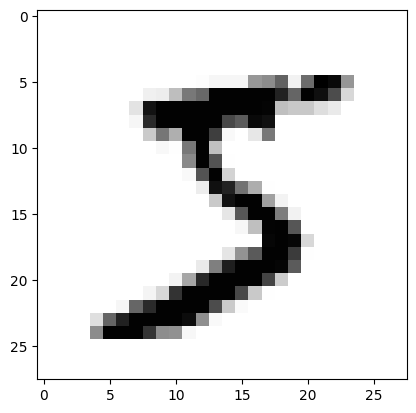

In [3]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [4]:
# 이미지가 인식되는 원리를 알아봅시다.
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

## 데이터 전처리

In [5]:
# 차원 변환 과정을 실습해 봅니다.
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255  # 픽셀의 밝기는 0~255이므로 255로 나눔으로써 0~1사이의 값으로 normalize

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255 # 픽셀의 밝기는 0~255이므로 255로 나눔으로써 0~1사이의 값으로 normalize

# 클래스 값을 확인해 봅니다.
print("class : %d " % (y_train[0]))

# 바이너리화 과정을 실습해 봅니다.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 모델 구축

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# MNIST 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


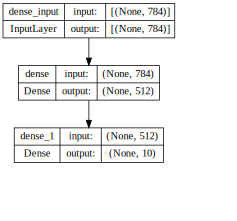

In [17]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [10]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18737, saving model to ./MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.18737 to 0.13616, saving model to ./MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13616 to 0.10827, saving model to ./MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.10827 to 0.10063, saving model to ./MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10063 to 0.08981, saving model to ./MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.08981 to 0.08710, saving model to ./MNIST_MLP.hdf5

Epoch 7: val_loss did not improve from 0.08710

Epoch 8: val_loss improved from 0.08710 to 0.08116, saving model to ./MNIST_MLP.hdf5

Epoch 9: val_loss improved from 0.08116 to 0.08045, saving model to ./MNIST_MLP.hdf5

Epoch 10: val_loss did not improve from 0.08045

Epoch 11: val_loss improved from 0.08045 to 0.07909, saving model to ./MNIST_MLP.hdf5

Epoch 12: val_loss did not improve from 0.07909

Epoch 13: val_loss did not improve from 0.07909

Epoch 14: val_loss did not improv

## 학습 그래프 분석

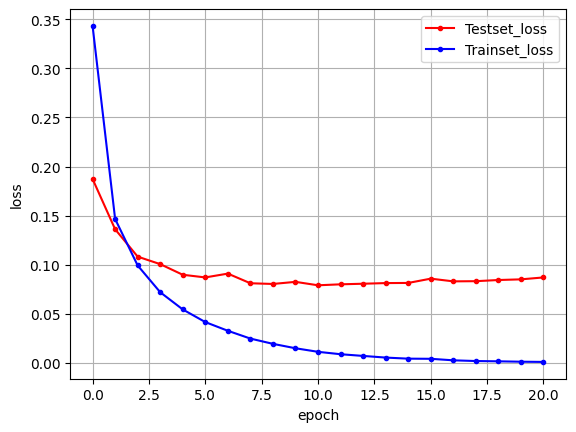

In [11]:

# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 예측성능 검토

In [ ]:
def y_inv_cat(y,y_d):
    y_rev1 = np.argmax(y,axis=1)
    y_rev = y_rev1 + y_d
    return y_rev


In [12]:
y_testpredsc = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_testpredsc

In [13]:
y_testpred = y_inv_cat(y_testpredsc,0)
y_test_ = y_inv_cat(y_test,0)

In [14]:
y_testpred

array([7, 2, 1, ..., 4, 5, 6])

In [15]:
from sklearn.metrics import precision_score , recall_score , confusion_matrix
import seaborn as sns

In [16]:
precision = precision_score(y_test_, y_testpred,average= "macro")
recall = recall_score(y_test_, y_testpred,average= "macro")
print('정밀도: {0:.4f}, 재현율: {1:.4f}'.format(precision, recall))

정밀도: 0.9821, 재현율: 0.9821
